In [42]:
"""
Clean Results Tables for Investigation D
Processes rescaled results, shows log2 and fold separately
Saves tables to results/ directory
PRIMARY DISPLAY: MEAN (with median also saved)
"""
import pandas as pd
import numpy as np
import os

# Create results directory if it doesn't exist
os.makedirs('results', exist_ok=True)

# Load results
df = pd.read_csv('ecoli_crp_data/cache/investigation_d_results_rescaled_all.csv')

# Filter out CRP
df_filtered = df[df['tf_knockdown'] != 'crp'].copy()

print("="*80)
print("INVESTIGATION D RESULTS TABLES")
print("="*80)

# ============================================================================
# TABLE 1: PER-TF RESULTS
# ============================================================================
print("\n" + "="*80)
print("PER-TF PERFORMANCE")
print("="*80)

# Group by TF - BOTH mean and median
per_tf_mean = df_filtered.groupby('tf_knockdown').agg({
    'baseline_error': 'mean',
    'baseline_fold_error': 'mean',
    'ode_abs_error': 'mean',
    'ode_fold_error': 'mean',
    'scm_abs_error': 'mean',
    'scm_fold_error': 'mean'
}).round(3)

per_tf_median = df_filtered.groupby('tf_knockdown').agg({
    'baseline_error': 'median',
    'baseline_fold_error': 'median',
    'ode_abs_error': 'median',
    'ode_fold_error': 'median',
    'scm_abs_error': 'median',
    'scm_fold_error': 'median'
}).round(3)

# Add statistic labels
per_tf_mean['statistic'] = 'mean'
per_tf_median['statistic'] = 'median'

# Combine and save (MEAN FIRST)
per_tf_combined = pd.concat([per_tf_mean, per_tf_median])
per_tf_combined.to_csv('results/per_tf_results.csv')
print("\n✓ Saved: results/per_tf_results.csv")

# Print tables - MEAN as primary
print("\nLog2 Error (mean):")
print(f"{'TF':<10} {'Baseline':>12} {'ODE':>12} {'SCM':>12}")
print("-"*50)
for tf in sorted(per_tf_mean.index):
    print(f"{tf:<10} {per_tf_mean.loc[tf, 'baseline_error']:>12.3f} "
          f"{per_tf_mean.loc[tf, 'ode_abs_error']:>12.3f} "
          f"{per_tf_mean.loc[tf, 'scm_abs_error']:>12.3f}")

print("\n\nFold Error (mean):")
print(f"{'TF':<10} {'Baseline':>12} {'ODE':>12} {'SCM':>12}")
print("-"*50)
for tf in sorted(per_tf_mean.index):
    print(f"{tf:<10} {per_tf_mean.loc[tf, 'baseline_fold_error']:>11.2f}× "
          f"{per_tf_mean.loc[tf, 'ode_fold_error']:>11.2f}× "
          f"{per_tf_mean.loc[tf, 'scm_fold_error']:>11.2f}×")

# ============================================================================
# TABLE 2: STRATIFIED BY EFFECT SIZE
# ============================================================================
print("\n" + "="*80)
print("STRATIFIED BY PERTURBATION MAGNITUDE")
print("="*80)

small = df_filtered[df_filtered['true_fc'].abs() < 0.5]
large = df_filtered[df_filtered['true_fc'].abs() >= 0.5]

# Create stratified results table (MEAN FIRST)
stratified_results = []

for group_name, group_data in [('Small (<0.5)', small), ('Large (≥0.5)', large)]:
    for stat_name, stat_func in [('mean', 'mean'), ('median', 'median')]:
        stratified_results.append({
            'group': group_name,
            'statistic': stat_name,
            'baseline_log2_error': group_data['baseline_error'].agg(stat_func),
            'ode_log2_error': group_data['ode_abs_error'].agg(stat_func),
            'scm_log2_error': group_data['scm_abs_error'].agg(stat_func),
            'baseline_fold_error': group_data['baseline_fold_error'].agg(stat_func),
            'ode_fold_error': group_data['ode_fold_error'].agg(stat_func),
            'scm_fold_error': group_data['scm_fold_error'].agg(stat_func),
            'n_samples': len(group_data)
        })

stratified_df = pd.DataFrame(stratified_results)
stratified_df = stratified_df.round(3)
stratified_df.to_csv('results/stratified_results.csv', index=False)
print("\n✓ Saved: results/stratified_results.csv")

# Print tables - MEAN as primary
print(f"\nLog2 Error (mean):")
print(f"{'Group':<15} {'Baseline':>12} {'ODE':>12} {'SCM':>12}")
print("-"*55)
print(f"{'Small (<0.5)':<15} {small['baseline_error'].mean():>12.3f} "
      f"{small['ode_abs_error'].mean():>12.3f} "
      f"{small['scm_abs_error'].mean():>12.3f}")
print(f"{'Large (≥0.5)':<15} {large['baseline_error'].mean():>12.3f} "
      f"{large['ode_abs_error'].mean():>12.3f} "
      f"{large['scm_abs_error'].mean():>12.3f}")

print(f"\n\nFold Error (mean):")
print(f"{'Group':<15} {'Baseline':>12} {'ODE':>12} {'SCM':>12}")
print("-"*55)
print(f"{'Small (<0.5)':<15} {small['baseline_fold_error'].mean():>11.2f}× "
      f"{small['ode_fold_error'].mean():>11.2f}× "
      f"{small['scm_fold_error'].mean():>11.2f}×")
print(f"{'Large (≥0.5)':<15} {large['baseline_fold_error'].mean():>11.2f}× "
      f"{large['ode_fold_error'].mean():>11.2f}× "
      f"{large['scm_fold_error'].mean():>11.2f}×")

# ============================================================================
# TABLE 3: OVERALL SUMMARY
# ============================================================================
print("\n" + "="*80)
print("OVERALL SUMMARY")
print("="*80)

# MEAN FIRST, then median
overall_results = []
for stat_name, stat_func in [('mean', 'mean'), ('median', 'median')]:
    overall_results.append({
        'statistic': stat_name,
        'baseline_log2_error': df_filtered['baseline_error'].agg(stat_func),
        'ode_log2_error': df_filtered['ode_abs_error'].agg(stat_func),
        'scm_log2_error': df_filtered['scm_abs_error'].agg(stat_func),
        'baseline_fold_error': df_filtered['baseline_fold_error'].agg(stat_func),
        'ode_fold_error': df_filtered['ode_fold_error'].agg(stat_func),
        'scm_fold_error': df_filtered['scm_fold_error'].agg(stat_func),
        'n_predictions': len(df_filtered)
    })

overall_df = pd.DataFrame(overall_results)
overall_df = overall_df.round(3)
overall_df.to_csv('results/overall_summary.csv', index=False)
print("\n✓ Saved: results/overall_summary.csv")

print(f"\nLog2 Error:")
print(f"{'Statistic':<12} {'Baseline':>12} {'ODE':>12} {'SCM':>12}")
print("-"*50)
for _, row in overall_df.iterrows():
    print(f"{row['statistic']:<12} {row['baseline_log2_error']:>12.3f} "
          f"{row['ode_log2_error']:>12.3f} "
          f"{row['scm_log2_error']:>12.3f}")

print(f"\nFold Error:")
print(f"{'Statistic':<12} {'Baseline':>12} {'ODE':>12} {'SCM':>12}")
print("-"*50)
for _, row in overall_df.iterrows():
    print(f"{row['statistic']:<12} {row['baseline_fold_error']:>11.2f}× "
          f"{row['ode_fold_error']:>11.2f}× "
          f"{row['scm_fold_error']:>11.2f}×")

print("\n" + "="*80)
print("ALL RESULTS SAVED TO results/")
print("="*80)
print("  - per_tf_results.csv: Per-TF performance (mean & median)")
print("  - stratified_results.csv: Stratified by effect size (mean & median)")
print("  - overall_summary.csv: Overall performance (mean & median)")
print("="*80)

INVESTIGATION D RESULTS TABLES

PER-TF PERFORMANCE

✓ Saved: results/per_tf_results.csv

Log2 Error (mean):
TF             Baseline          ODE          SCM
--------------------------------------------------
araC              0.233        1.635        0.189
fis               0.469        1.930        0.450
galR              0.523        1.755        0.397
ihfA              0.442        1.424        0.360
ihfB              0.508        1.474        0.328
lacI              0.815        2.055        0.630
malT              0.185        1.615        0.151


Fold Error (mean):
TF             Baseline          ODE          SCM
--------------------------------------------------
araC              1.18×        4.31×        1.15×
fis               1.48×        5.79×        1.48×
galR              1.73×        4.98×        1.48×
ihfA              1.38×        3.62×        1.29×
ihfB              1.47×        3.58×        1.27×
lacI              2.55×        5.27×        1.82×
malT              1

PKN VISUALIZATION

Loading CRP regulon module...
Built TF name mapping: 243 TFs
Loading RegulonDB network from: NetworkRegulatorGene.tsv
Loaded RegulonDB network: 2819 genes, 7015 edges
  Added TF-TF interactions: 7594 total edges
Loaded gene info for 4748 genes
  Found CRP as 'crp' with 639 targets
  Building CRP regulon: 50 genes total

Loaded crp_regulon module:
  Genes: 50
  Edges: 77
  Density: 3.1%
Building PKN...
PKN BUILDER - VERSION 2 WITH BASAL EDGES

Adding basal production edges...
  ✓ Added 50 basal edges

Adding regulatory edges from network...
  ✓ Added 77 regulatory edges

Total edges in PKN: 127
  Basal: 50
  Regulatory: 77
✓ CRP regulon: 50 genes, 127 edges

Creating visualization...
PKN: 51 nodes
  - 109 activation edges (solid)
  - 0 inhibition edges (dashed)
  - 7 inhibition target nodes (orange)
✓ Saved to: figures/ecoli_pkn.png


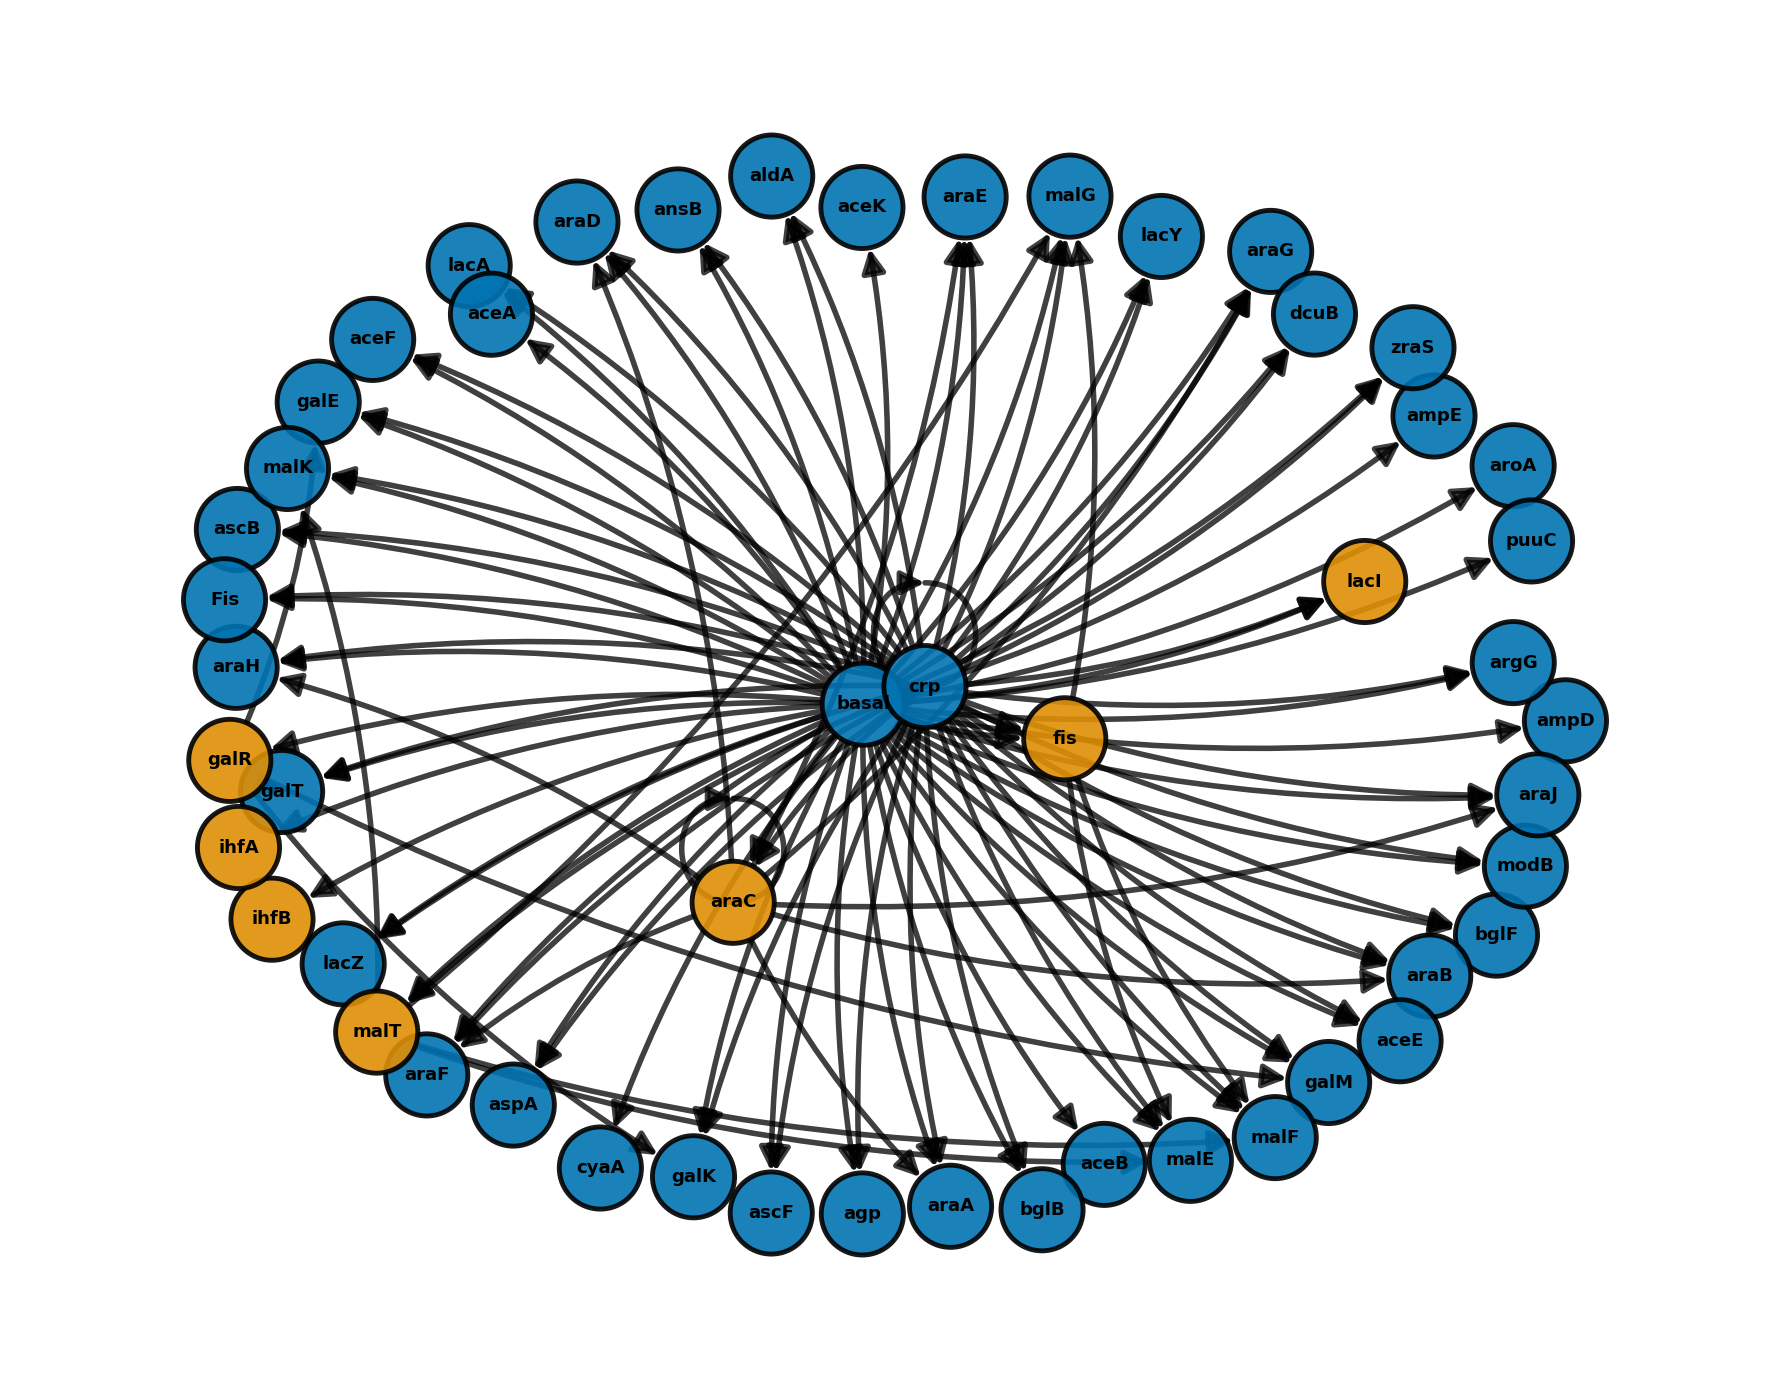

In [9]:
"""
Visualize Full PKN (Prior Knowledge Network)
Shows activations (solid lines) and inhibitions (dashed lines)
Highlights inhibition target nodes in orange
"""

import sys
import matplotlib.pyplot as plt
import networkx as nx
import os

sys.path.append('.')
sys.path.append('ecoli_code_modules/')

from ecoli_crispri_dataloader_full import EcoliCRISPRiDataLoader


def visualize_pkn(pkn, inhibition_targets, figsize=(18, 14), layout='spring'):
    """
    Visualize PKN with solid lines for activations and dashed lines for inhibitions
    
    Args:
        pkn: Dictionary with 'edges' key containing list of (source, target, sign) tuples
             where sign is 'activate' or 'inhibit'
        inhibition_targets: List of gene names that were targeted with inhibitions
    """
    
    # Create graph and separate edge types
    G = nx.DiGraph()
    activation_edges = []
    inhibition_edges = []
    
    for source, target, sign in pkn['edges']:
        G.add_edge(source, target)
        if sign == 'activate':
            activation_edges.append((source, target))
        elif sign == 'inhibit':
            inhibition_edges.append((source, target))
    
    print(f"PKN: {len(G.nodes())} nodes")
    print(f"  - {len(activation_edges)} activation edges (solid)")
    print(f"  - {len(inhibition_edges)} inhibition edges (dashed)")
    print(f"  - {len(inhibition_targets)} inhibition target nodes (orange)")
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Layout
    if layout == 'spring':
        pos = nx.spring_layout(G, k=3, iterations=100, seed=42)
    elif layout == 'kamada_kawai':
        pos = nx.kamada_kawai_layout(G)
    else:
        pos = nx.spring_layout(G, k=3, iterations=100, seed=42)
    
    # Color nodes - orange for inhibition targets, blue for others
    node_colors = []
    for node in G.nodes():
        if node in inhibition_targets:
            node_colors.append('#DE8F05')  # Orange for inhibition targets
        else:
            node_colors.append('#0173B2')  # Blue for regular nodes
    
    # Draw nodes - BIGGER
    node_size = 3500
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, 
                          node_size=node_size, alpha=0.9, ax=ax,
                          edgecolors='black', linewidths=3.5)
    
    # Draw activation edges - SOLID
    if activation_edges:
        nx.draw_networkx_edges(G, pos, edgelist=activation_edges,
                              edge_color='black', 
                              arrows=True, arrowsize=35, 
                              arrowstyle='-|>', width=4.0, 
                              alpha=0.75, ax=ax,
                              style='solid',
                              connectionstyle='arc3,rad=0.1',
                              min_source_margin=30,
                              min_target_margin=30)
    
    # Draw inhibition edges - DASHED
    if inhibition_edges:
        nx.draw_networkx_edges(G, pos, edgelist=inhibition_edges,
                              edge_color='#D55E00',  # Orange-red for inhibitions
                              arrows=True, arrowsize=35, 
                              arrowstyle='-|>', width=4.0, 
                              alpha=0.75, ax=ax,
                              style='dashed',
                              connectionstyle='arc3,rad=0.1',
                              min_source_margin=30,
                              min_target_margin=30)
    
    # Labels - BIGGER and BOLD
    nx.draw_networkx_labels(G, pos, font_size=13, font_weight='bold', ax=ax)
    
    ax.axis('off')
    ax.margins(0.1)
    plt.tight_layout()
    
    return fig, G


# Main execution
if __name__ == "__main__":
    print("="*80)
    print("PKN VISUALIZATION")
    print("="*80)
    
    # Load CRP regulon module
    print("\nLoading CRP regulon module...")
    loader = EcoliCRISPRiDataLoader('ecoli_crp_data')
    genes, network = loader.load_functional_module('crp_regulon')
    
    # Build PKN
    print("Building PKN...")
    pkn = loader.build_pkn_dict(genes, network)
    
    print(f"✓ CRP regulon: {len(genes)} genes, {len(pkn['edges'])} edges\n")
    
    # Define inhibition targets (the 7 TFs we tested, excluding crp)
    inhibition_targets = ['araC', 'fis', 'galR', 'ihfA', 'ihfB', 'lacI', 'malT']
    
    # Visualize
    print("Creating visualization...")
    fig, G = visualize_pkn(pkn, inhibition_targets, layout='spring', figsize=(18, 14))
    
    # Create figures directory if it doesn't exist
    os.makedirs('figures', exist_ok=True)
    
    # Save to figures/
    output_file = 'figures/ecoli_pkn.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight', 
               facecolor='white', edgecolor='none')
    print(f"✓ Saved to: {output_file}")
    
    plt.show()
    
    print("\n" + "="*80)

Loading structure from: ecoli_crp_data/cache/crp_regulon_hill_structure.pkl
Full structure: 50 variables

Extracting subgraph for inhibitions: ['araC', 'fis', 'galR', 'ihfA', 'ihfB', 'lacI', 'malT']
Found 7 inhibition nodes:
  - I_araC
  - I_fis
  - I_galR
  - I_ihfA
  - I_ihfB
  - I_lacI
  - I_malT

Total subgraph nodes: 30

Subgraph: 23 downstream variables, 7 inhibition nodes
Total edges: 26

Creating visualization...
  Using spring layout with seed=100, k=3.5 (more spacing)
✓ Saved to: figures/ecoli_inhibition_subgraph.png

Tip: If edges still go through nodes, try different seeds:
     Current: LAYOUT_SEED = 100
     Try: 123, 456, 789, 1000, 2025, 3141, 5000, etc.


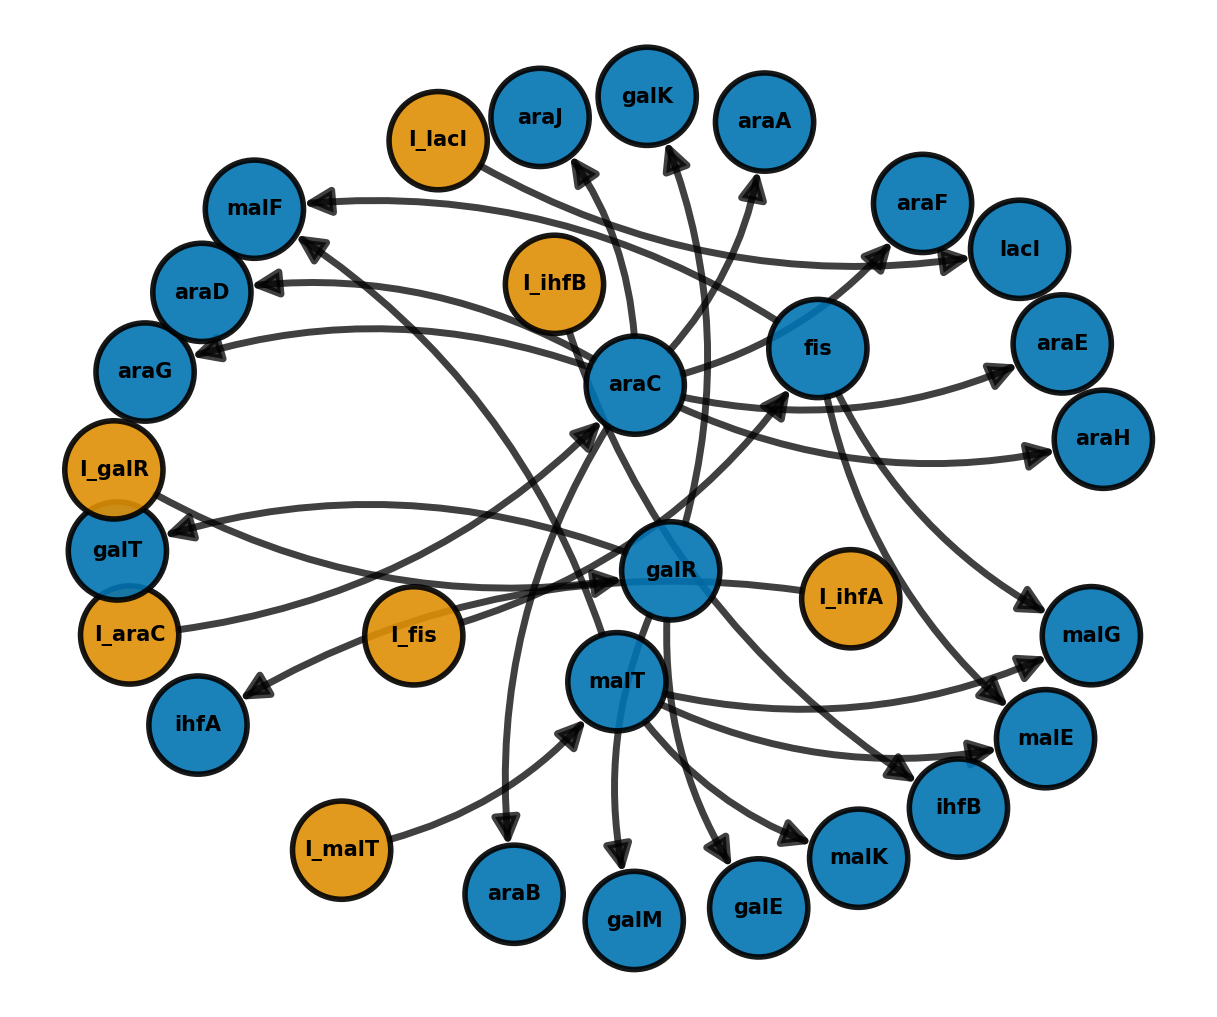

In [39]:
"""
Visualize Inhibition Subgraph - Force-Directed with Better Spacing
Nodes with more connections naturally move to center
"""

import pickle
import matplotlib.pyplot as plt
import networkx as nx
import os

# ============================================================
# CHANGE THIS SEED TO GET DIFFERENT LAYOUTS
# Try: 42, 123, 456, 789, 1000, 2025, 3141, 5000, etc.
# Some seeds will have clearer edge routing than others
LAYOUT_SEED = 100
# ============================================================


def load_structure(filepath):
    """Load structure from pickle file"""
    with open(filepath, 'rb') as f:
        structure, topo_order = pickle.load(f)
    return structure, topo_order


def extract_specific_inhibition_subgraph(structure, inhibition_targets):
    """Extract inhibition nodes and their descendants"""
    G_full = nx.DiGraph()
    for child, parents in structure.items():
        for parent in parents:
            G_full.add_edge(parent, child)
    
    inhibition_nodes = [f'I_{target}' for target in inhibition_targets]
    missing = [node for node in inhibition_nodes if node not in G_full.nodes()]
    if missing:
        print(f"WARNING: These inhibition nodes not found: {missing}")
    
    inhibition_nodes = [node for node in inhibition_nodes if node in G_full.nodes()]
    
    print(f"Found {len(inhibition_nodes)} inhibition nodes:")
    for inode in sorted(inhibition_nodes):
        print(f"  - {inode}")
    
    subgraph_nodes = set(inhibition_nodes)
    for inode in inhibition_nodes:
        descendants = nx.descendants(G_full, inode)
        subgraph_nodes.update(descendants)
    
    print(f"\nTotal subgraph nodes: {len(subgraph_nodes)}")
    
    subgraph_structure = {}
    for var in subgraph_nodes:
        if var in structure:
            parents_in_subgraph = [p for p in structure[var] if p in subgraph_nodes]
            subgraph_structure[var] = parents_in_subgraph
        else:
            subgraph_structure[var] = []
    
    return subgraph_structure, inhibition_nodes


def visualize_dag(structure, inhibition_nodes, figsize=(12, 10), seed=42):
    """Visualize DAG with force-directed layout - better spacing"""
    
    # Create graph
    G = nx.DiGraph()
    for child, parents in structure.items():
        for parent in parents:
            G.add_edge(parent, child)
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Spring layout with MORE spacing (higher k = more space between nodes)
    pos = nx.spring_layout(G, k=3.5, iterations=150, seed=seed)
    print(f"  Using spring layout with seed={seed}, k=3.5 (more spacing)")
    
    # Colors
    node_colors = []
    for node in G.nodes():
        if node.startswith('I_'):
            node_colors.append('#DE8F05')  # Orange for inhibitions
        else:
            node_colors.append('#0173B2')  # Blue for downstream variables
    
    node_size = 5000
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, 
                          node_size=node_size, alpha=0.9, ax=ax,
                          edgecolors='black', linewidths=4.0)
    
    # Draw edges with margins that make them touch/nearly touch the node boundaries
    # For node_size=5000, a margin of ~35-40 makes edges touch the visual boundary
    nx.draw_networkx_edges(G, pos, edge_color='black', 
                          arrows=True, arrowsize=40, 
                          arrowstyle='-|>', width=5.0, 
                          alpha=0.75, ax=ax,
                          connectionstyle='arc3,rad=0.2',  # Moderate curvature
                          min_source_margin=35,  # Edges touch/nearly touch node boundary
                          min_target_margin=35)
    
    # Labels
    nx.draw_networkx_labels(G, pos, font_size=15, font_weight='bold', ax=ax)
    
    ax.axis('off')
    ax.margins(0.05)
    plt.tight_layout(pad=0.1)
    
    return fig, G


# Main execution
if __name__ == "__main__":
    structure_file = 'ecoli_crp_data/cache/crp_regulon_hill_structure.pkl'
    
    print("Loading structure from:", structure_file)
    structure, topo_order = load_structure(structure_file)
    
    print(f"Full structure: {len(structure)} variables\n")
    
    inhibition_targets = ['araC', 'fis', 'galR', 'ihfA', 'ihfB', 'lacI', 'malT']
    
    print(f"Extracting subgraph for inhibitions: {inhibition_targets}")
    subgraph, inhibition_nodes = extract_specific_inhibition_subgraph(
        structure, inhibition_targets
    )
    
    all_sub_vars = set(subgraph.keys())
    for parents in subgraph.values():
        all_sub_vars.update(parents)
    
    inhibitions = [v for v in all_sub_vars if v.startswith('I_')]
    regulars = [v for v in all_sub_vars if not v.startswith('I_')]
    
    print(f"\nSubgraph: {len(regulars)} downstream variables, {len(inhibitions)} inhibition nodes")
    print(f"Total edges: {sum(len(p) for p in subgraph.values())}")
    
    print("\nCreating visualization...")
    fig, G = visualize_dag(subgraph, inhibition_nodes, figsize=(12, 10), seed=LAYOUT_SEED)
    
    os.makedirs('figures', exist_ok=True)
    
    output_file = 'figures/ecoli_inhibition_subgraph.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight', 
               facecolor='white', edgecolor='none')
    print(f"✓ Saved to: {output_file}")
    
    print(f"\nTip: If edges still go through nodes, try different seeds:")
    print(f"     Current: LAYOUT_SEED = {LAYOUT_SEED}")
    print(f"     Try: 123, 456, 789, 1000, 2025, 3141, 5000, etc.")
    
    plt.show()